Name: Htwe Eaint Phyu

*   Predict the percentage of a student based on the number of study hours
*   Data can be found at http://bit.ly/w-data
*   What will be a predicted score if a student studies for 9.25 hours a day?

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data set

In [2]:
#importing data set
data_set = pd.read_csv("http://bit.ly/w-data")
data_set.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


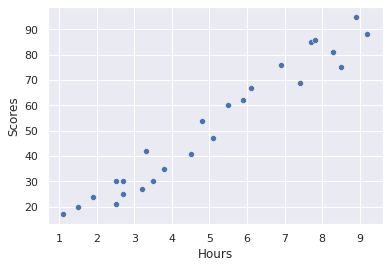

In [3]:
# use the function regplot to make a scatterplot
sns.set_theme(color_codes=True)
sns.scatterplot(x=data_set["Hours"], y=data_set["Scores"])
plt.show()

# Prepare the data

In [4]:
from sklearn.model_selection import train_test_split

#reshaping into 2 dimensional numpy arrays
X = (data_set['Hours'].values).reshape(-1,1)
y = (data_set['Scores'].values)

#Split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
print(len(X_train))
print(len(X_test))
print("Shape of X_train is ", X_train.shape)
print("Shape of y_train is ", y_train.shape)

18
7
Shape of X_train is  (18, 1)
Shape of y_train is  (18,)


# Train the model

In [6]:
from sklearn.linear_model import LinearRegression

#train the Linear Regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [7]:
slope = regressor.coef_
intercept = regressor.intercept_

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


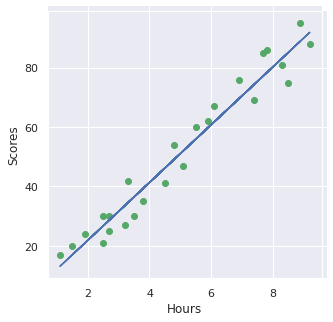

In [8]:
line = regressor.coef_*X + regressor.intercept_ #linear function = wx+b
grid = sns.JointGrid(x = data_set["Hours"], y = data_set["Scores"],space=0, height=5, ratio=60)
grid.plot_joint(plt.scatter, color="g")
plt.plot(data_set["Hours"], line)
plt.show()

# Predict the model

In [9]:
# Predict the scores
y_pred = regressor.predict(X_test) 

In [10]:
#Compare predicted Vs actual results
compared_result = pd.DataFrame({'Actual': pd.Series(y_test), 'Predicted': y_pred})
compared_result

,Actual,Predicted
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


# What will be a predicted score if a student studies for 9.25 hours a day?

In [11]:
hours = np.array([[9.25]])
pred_score = regressor.predict(hours)
print(pred_score)
print("No of hours: {}, Predicted Scores: {}".format(hours[0][0], pred_score[0]))

[92.33571987]
No of hours: 9.25, Predicted Scores: 92.33571987331146


#Evaluate the model

In [12]:
from sklearn.metrics import mean_squared_error
#Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error: ", mse)

Mean Square Error:  23.51639603459522


In [13]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  4.425394675156182
